In [4]:
import pandas as pd
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")
print("Libraries Loaded Successfully!")

df = pd.read_csv('train.csv')
print("Columns in dataset:", df.columns.tolist())
df.head()



Libraries Loaded Successfully!
Columns in dataset: ['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'sampen', 'higuci', 'datasetId', 'condition']


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


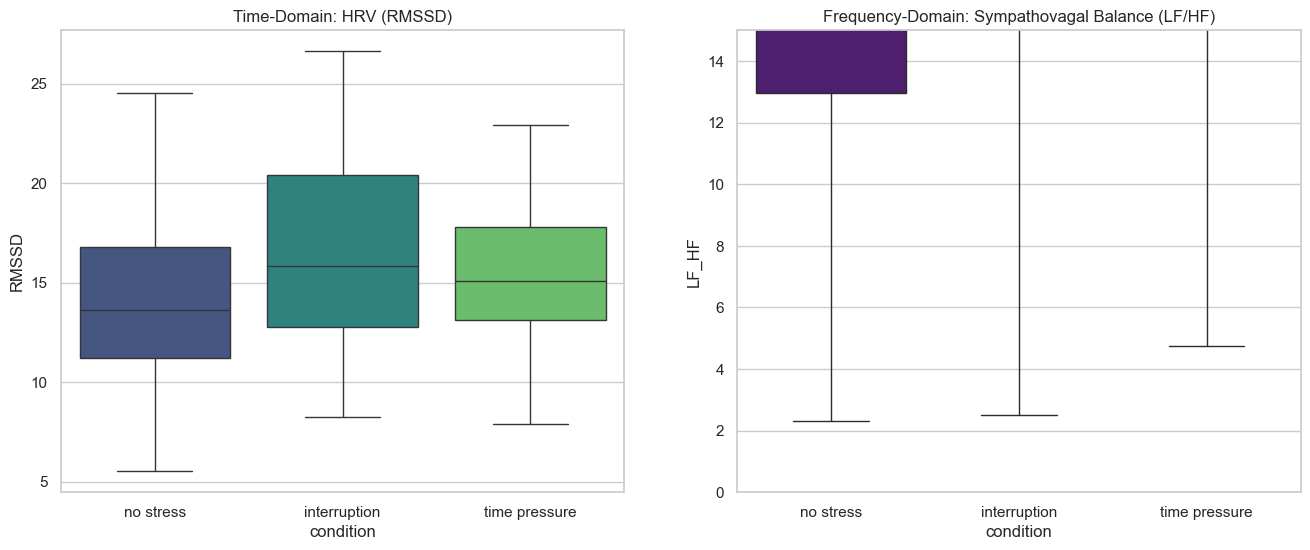

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Time Domain (RMSSD)
sns.boxplot(ax=axes[0], data=df, x='condition', y='RMSSD',
            hue='condition', legend=False, palette="viridis")
axes[0].set_title("Time-Domain: HRV (RMSSD)")

# Plot 2: Frequency Domain (LF/HF Ratio)
sns.boxplot(ax=axes[1], data=df, x='condition', y='LF_HF',
            hue='condition', legend=False, palette="magma")
axes[1].set_title("Frequency-Domain: Sympathovagal Balance (LF/HF)")
axes[1].set_ylim(0, 15) # Zoom in to ignore extreme outliers

plt.show()

In [12]:
# strees model
# necessary libraries for the ML model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle

# 1. Define Features (X) and Target (y)
# We use the columns we visualized: Time Domain + Freq Domain + Heart Rate
features = ['MEAN_RR', 'RMSSD', 'LF_HF', 'HR']
target = 'condition'

X = df[features]
y = df[target]

# 2. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Model (Random Forest)
print("Training AI Model... (This might take 10-20 seconds)")
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 4. Evaluate Accuracy
predictions = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

# 5. Save the Model for your App
with open('stress_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("SUCCESS: Model saved as 'stress_model.pkl'")



Training AI Model... (This might take 10-20 seconds)
Model Accuracy: 0.880297327303745

Classification Report:
                precision    recall  f1-score   support

 interruption       0.95      0.83      0.89     21029
    no stress       0.85      0.97      0.91     40073
time pressure       0.90      0.68      0.77     12756

     accuracy                           0.88     73858
    macro avg       0.90      0.83      0.85     73858
 weighted avg       0.89      0.88      0.88     73858

SUCCESS: Model saved as 'stress_model.pkl'
